<a href="https://colab.research.google.com/github/startbkgogo/first/blob/main/ch05_bargraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 124MB/s]


'ns_book7.csv'

In [4]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [5]:
# 발행년도 별 발간 도서의 갯수 k = 발행년도, v = 갯수
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [21]:
# 인덱스로 정렬시킨다.
count_by_year = count_by_year.sort_index()
count_by_year
# 타입 출력 : pandas.core.series.Series : 데이터프레임의 데이틀 구조형식
# print(type(count_by_year))

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2020,11834
2021,1255
2025,1


In [22]:
# 인덱스 순으로 정렬시킨다.
count_by_year = count_by_year[count_by_year.index <= 2025]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [23]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [33]:
ns_book7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376770 entries, 0 to 376769
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       376770 non-null  int64 
 1   도서명      376770 non-null  object
 2   저자       376770 non-null  object
 3   출판사      376770 non-null  object
 4   발행년도     376770 non-null  int64 
 5   ISBN     376770 non-null  object
 6   세트 ISBN  55866 non-null   object
 7   부가기호     308252 non-null  object
 8   권        61793 non-null   object
 9   주제분류번호   359792 non-null  object
 10  도서권수     376770 non-null  int64 
 11  대출건수     376770 non-null  int64 
 12  등록일자     376770 non-null  object
dtypes: int64(4), object(9)
memory usage: 37.4+ MB


In [8]:
# 주제별 도서 개수 구하기
import numpy as np  # -> np.nan을 사용하기 위해 넘파이를 임포트 합니다.

# '주제분류번호' 열의 값이 NaN인 경우 -1 을 반환합니다. 그렇지 않으면 첫번째 문자를 반환합니다.
def kdc_1st_char(no):
    # 000(총류) ~ 900(역사) -> 맨 앞자리가 큰 분류에 해당된다.
    if no is np.nan:
        return '-1'
    else:
        return no[0] # 큰 분류에 해당되는 맨 앞자리 데이터

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [9]:
# 선 그래프 그리기
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

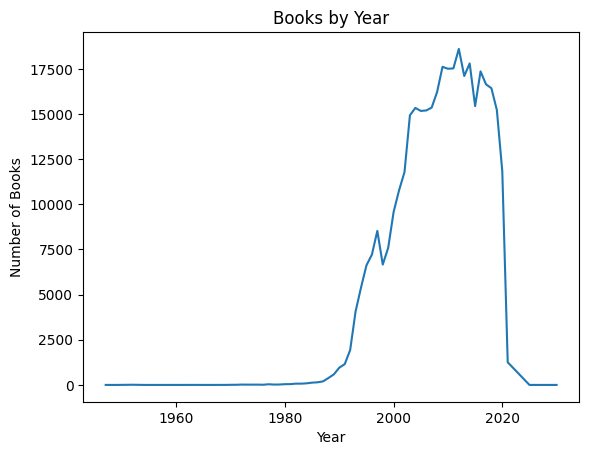

In [10]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

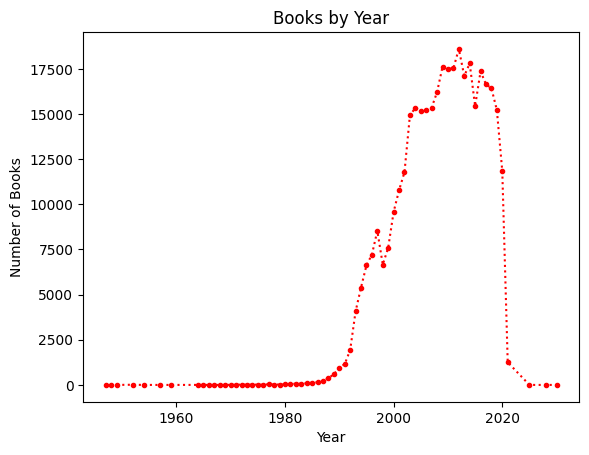

In [16]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

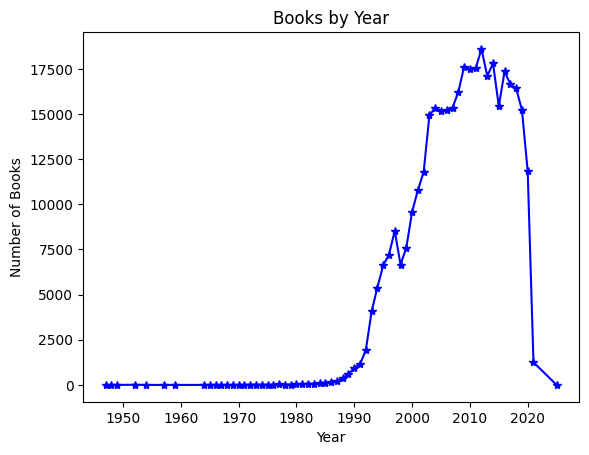

In [43]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
#  marker="." : 없음 -> . , linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, '*-b')
plt.title('Books by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

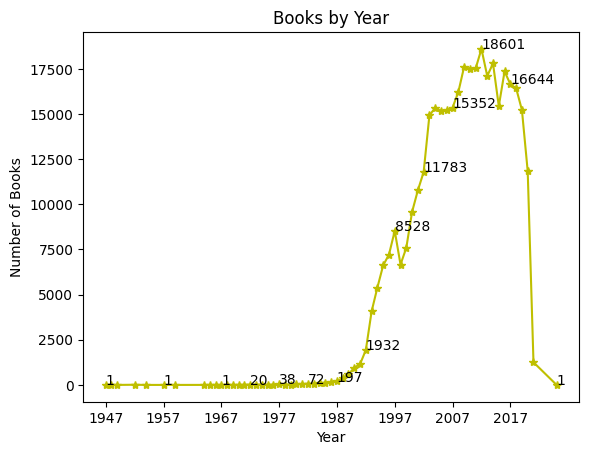

In [64]:
# 선 그래프 눈금 개수 조절 및 마커에 텍스트 표시하기
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
# marker="." : 없음 -> ., linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, '*-y')
plt.title('Books by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(range(1947, 2025, 10))
# count_by_year[::5] - 부분 데이터 프레임 시작:끝:step - 시작부분 맨 처음이면 생략, 끝부분이 맨 마지막이면 생략한다.
# ::5 - 5 개을 건너 띄어서 표시
for idx, val in count_by_year[::5].items():
    # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
    plt.annotate(val, (idx, val))

plt.show()

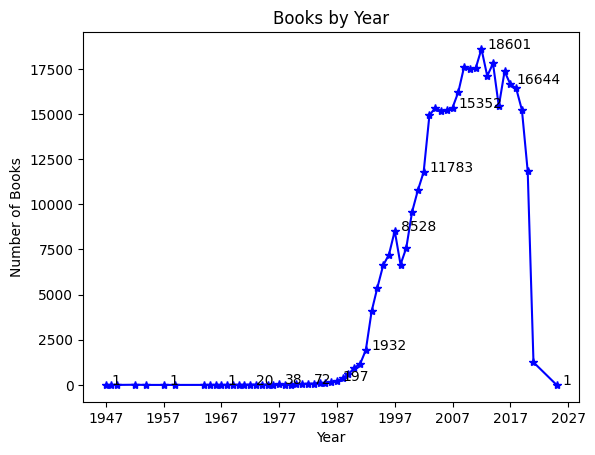

In [45]:
plt.plot(count_by_year, '*-b')
plt.title('Books by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(range(1947, 2025, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10))

plt.show()

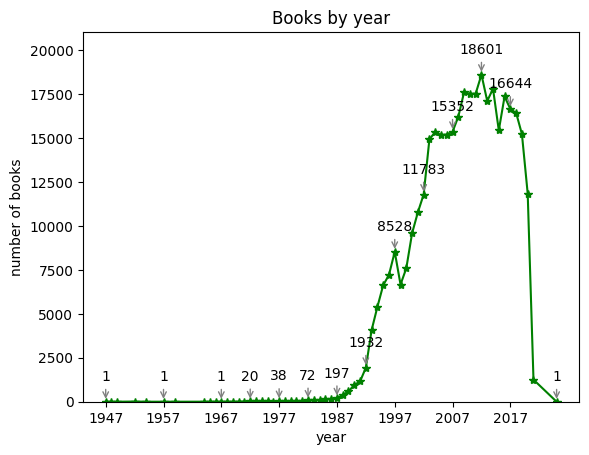

In [90]:
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "*-g")
plt.title("Books by year")
plt.xlabel("year")
plt.ylabel("number of books")
# y 축의 데이터 범위 늘리기
plt.ylim(0, count_by_year.values.max() * 1.13)
plt.xticks(range(1947, 2025, 10))
# count_by_year[::5] - 부분 데이터 프레임 시작:끝:step - 시작부분 맨 처음이면 생략, 끝부분이 맨 마지막이면 생략한다.
# ::5 - 5 개를 건너 띄어서 표시
for idx, val in count_by_year[::5].items():
  # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
  #  xytext=(2, 2) - x축으로 2pt y축으로 2pt 떨어 뜨려서 표시한다.
  plt.annotate(val, (idx, val), xytext=(0, 15), textcoords="offset points",
               # 화살표와 데이터 가운데 자동 설정
               ha="center", arrowprops=dict(arrowstyle="->", color="gray"))
plt.show()

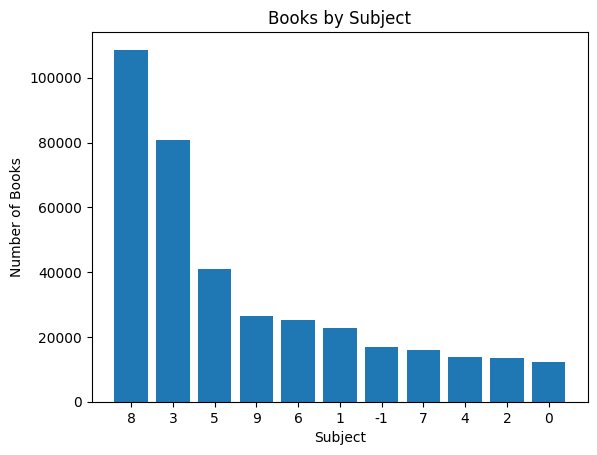

In [34]:
# 막대 그래프 그리기
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Books')
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')


plt.show()

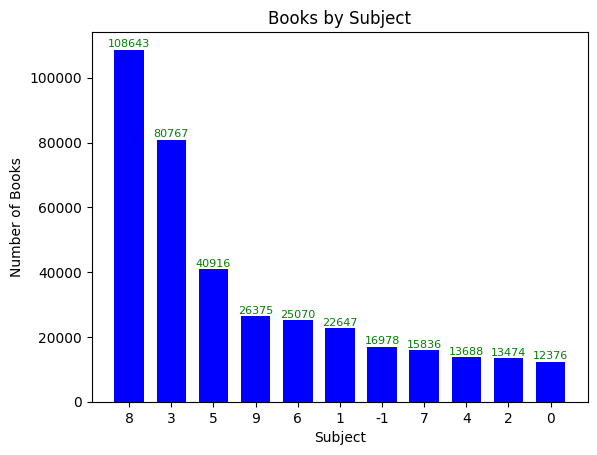

In [35]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points', fontsize=8, ha='center', color='green')

plt.show()

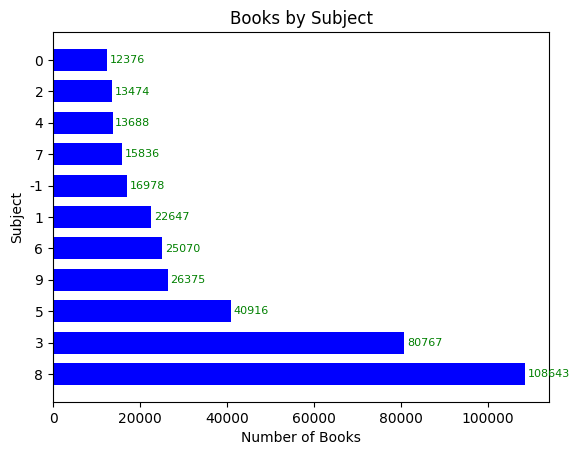

In [42]:
# 가로 막대 그래프 그리기
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by Subject')
plt.xlabel('Number of Books')
plt.ylabel('Subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points', fontsize=8, va='center', color='green')

plt.show()

In [72]:
import sys
if 'google.colab' in sys.modules:
    !wget https://bit.ly/3wrj4xf -O jupiter.png

--2025-04-17 08:00:18--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2025-04-17 08:00:18--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.02s   

2025-04-17 08:00:18 (185 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



In [73]:
img = plt.imread('jupiter.png')
img.shape

(1561, 1646, 3)

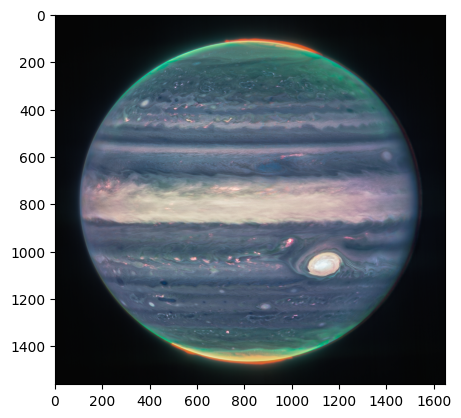

In [74]:
plt.imshow(img)
plt.show()

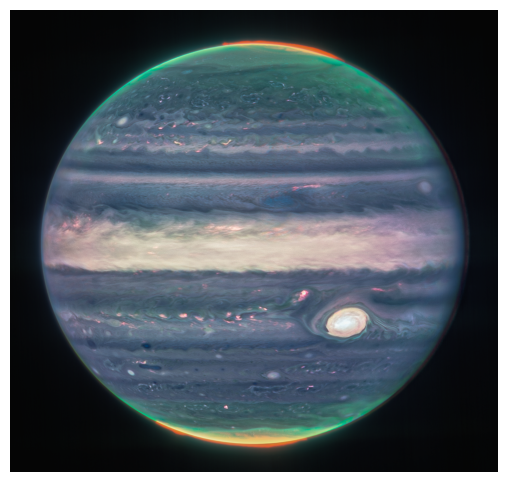

In [75]:
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

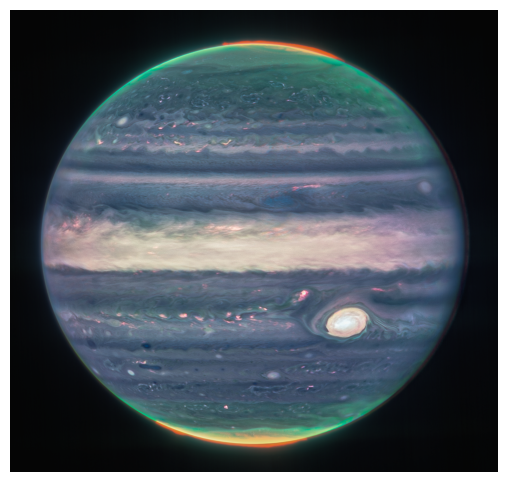

In [80]:
from PIL import Image

pil_img = Image.open('jupiter.png')
plt.figure(figsize=(8, 6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

In [81]:
import numpy as np

arr_img = np.array(pil_img)
arr_img.shape

(1561, 1646, 3)

In [82]:
plt.imsave('jupiter-gray.png', arr_img)